In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplcyberpunk
import missingno
plt.style.use('cyberpunk')

### load customer dataset

In [167]:
data_customer = pd.read_csv('Data/olist_customers_dataset.csv')
data_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,São Paulo
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,São Paulo
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,São Paulo
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,São Paulo
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,São Paulo


### Check nulls

In [168]:
data_customer.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

### Check Duplicated

In [169]:
data_customer.duplicated().sum()

0

### load Location dataset

In [170]:
data_gelocation = pd.read_csv('Data/olist_geolocation_dataset.csv')
data_gelocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### Check nulls

In [171]:
data_gelocation.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [172]:
data_gelocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


### Check Duplicated

In [173]:
data_gelocation.duplicated().sum()

261831

In [174]:
data_gelocation = data_gelocation.drop_duplicates()

### update state column

In [175]:
data_gelocation.geolocation_state.unique()

array(['SP', 'RN', 'AC', 'RJ', 'ES', 'MG', 'BA', 'SE', 'PE', 'AL', 'PB',
       'CE', 'PI', 'MA', 'PA', 'AP', 'AM', 'RR', 'DF', 'GO', 'RO', 'TO',
       'MT', 'MS', 'RS', 'PR', 'SC'], dtype=object)

In [176]:
state_map = {
    "AC": "Acre",
    "AL": "Alagoas",
    "AP": "Amapá",
    "AM": "Amazonas",
    "BA": "Bahia",
    "CE": "Ceará",
    "DF": "Federal District",
    "ES": "Espírito Santo",
    "GO": "Goiás",
    "MA": "Maranhão",
    "MT": "Mato Grosso",
    "MS": "Mato Grosso do Sul",
    "MG": "Minas Gerais",
    "PA": "Pará",
    "PB": "Paraíba",
    "PR": "Paraná",
    "PE": "Pernambuco",
    "PI": "Piauí",
    "RJ": "Rio de Janeiro",
    "RN": "Rio Grande do Norte",
    "RS": "Rio Grande do Sul",
    "RO": "Rondônia",
    "RR": "Roraima",
    "SC": "Santa Catarina",
    "SP": "São Paulo",
    "SE": "Sergipe",
    "TO": "Tocantins"
}

data_gelocation.geolocation_state =data_gelocation.geolocation_state.map(state_map)
data_gelocation.geolocation_state.unique()


C:\Users\Dell\AppData\Local\Temp\ipykernel_26532\1159263988.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gelocation.geolocation_state =data_gelocation.geolocation_state.map(state_map)


array(['São Paulo', 'Rio Grande do Norte', 'Acre', 'Rio de Janeiro',
       'Espírito Santo', 'Minas Gerais', 'Bahia', 'Sergipe', 'Pernambuco',
       'Alagoas', 'Paraíba', 'Ceará', 'Piauí', 'Maranhão', 'Pará',
       'Amapá', 'Amazonas', 'Roraima', 'Federal District', 'Goiás',
       'Rondônia', 'Tocantins', 'Mato Grosso', 'Mato Grosso do Sul',
       'Rio Grande do Sul', 'Paraná', 'Santa Catarina'], dtype=object)

In [211]:
data_gelocation.to_csv('olist_geolocation_dataset.csv', index=False)

### load Order Item dataset

In [177]:
data_order_items = pd.read_csv('Data/olist_order_items_dataset.csv')
data_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19T09:45:00.0000000,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03T11:05:00.0000000,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18T14:48:00.0000000,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15T10:10:00.0000000,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13T13:57:00.0000000,199.90,18.14


### update date to dateTime data type

In [178]:
data_order_items.shipping_limit_date = data_order_items.shipping_limit_date.astype('datetime64[ns]')
data_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112649 entries, 0 to 112648
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112649 non-null  object        
 1   order_item_id        112649 non-null  int64         
 2   product_id           112649 non-null  object        
 3   seller_id            112649 non-null  object        
 4   shipping_limit_date  112649 non-null  datetime64[ns]
 5   price                112649 non-null  float64       
 6   freight_value        112649 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


### Check nulls

In [179]:
data_order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

### Check Duplicated

In [180]:
data_order_items.duplicated().sum()

0

### Check Outliear

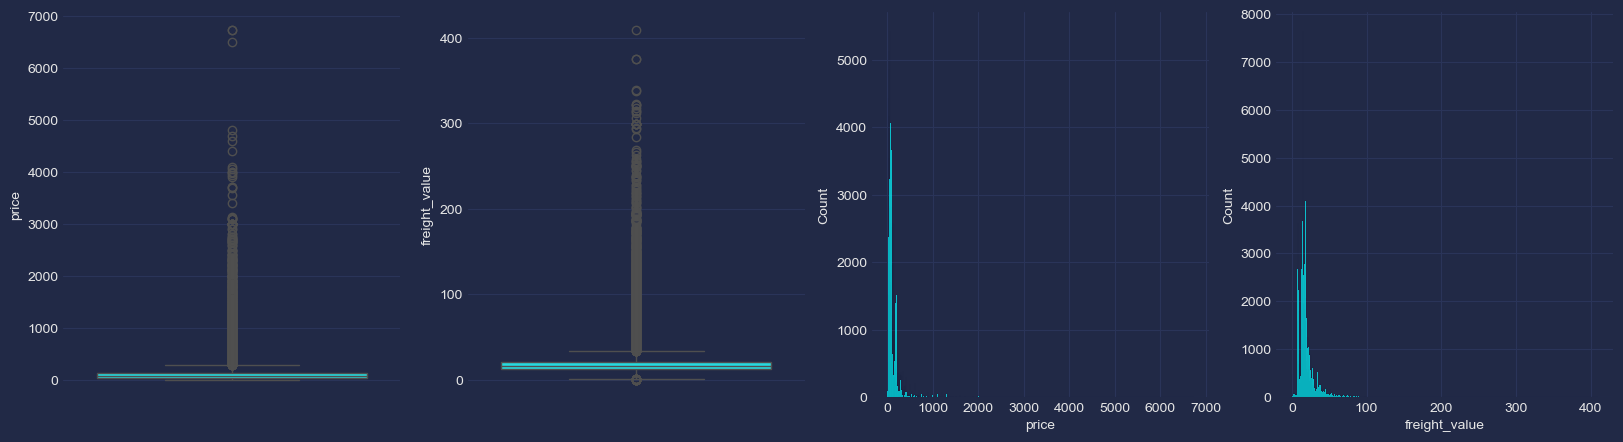

In [181]:
plt.figure(figsize=(20,5))
plt.subplot(1 , 4 , 1)
sns.boxplot(data_order_items.price)
plt.subplot(1 , 4 , 2)
sns.boxplot(data_order_items.freight_value)
plt.subplot(1 , 4 , 3)
sns.histplot(data_order_items.price)
plt.subplot(1 , 4 , 4)
sns.histplot(data_order_items.freight_value)
plt.show()

### load payments dataset

In [184]:
data_order_payments = pd.read_csv('Data/olist_order_payments_dataset.csv')
data_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit card,2,128.45


### Check nulls

In [185]:
data_order_payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

### Check Duplicated

In [186]:
data_order_payments.duplicated().sum()

0

### Check Outlier

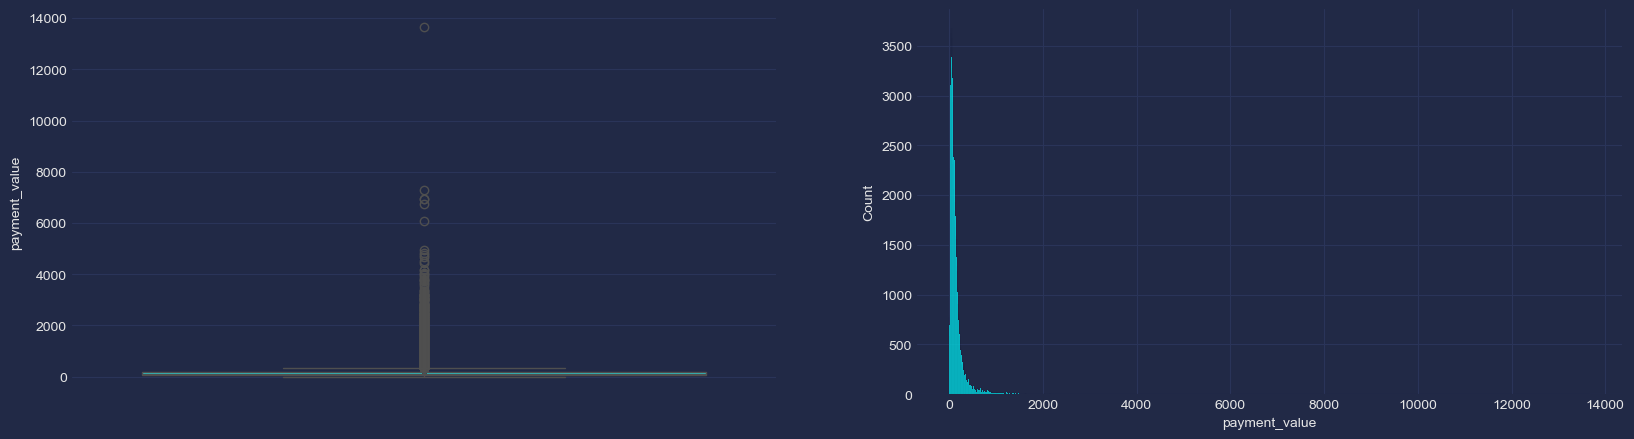

In [187]:
plt.figure(figsize=(20,5))
plt.subplot(1 , 2 , 1)
sns.boxplot(data_order_payments.payment_value)

plt.subplot(1 , 2 , 2)
sns.histplot(data_order_payments.payment_value)

plt.show()

### load reviews dataset

In [190]:
data_order_reviews = pd.read_csv('Data/olist_order_reviews_dataset.csv')
data_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,18/01/2018 0:00,18/01/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,10/03/2018 0:00,11/03/2018 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,17/02/2018 0:00,18/02/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,21/04/2017 0:00,21/04/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,01/03/2018 0:00,02/03/2018 10:26


### Check nulls

<Axes: >

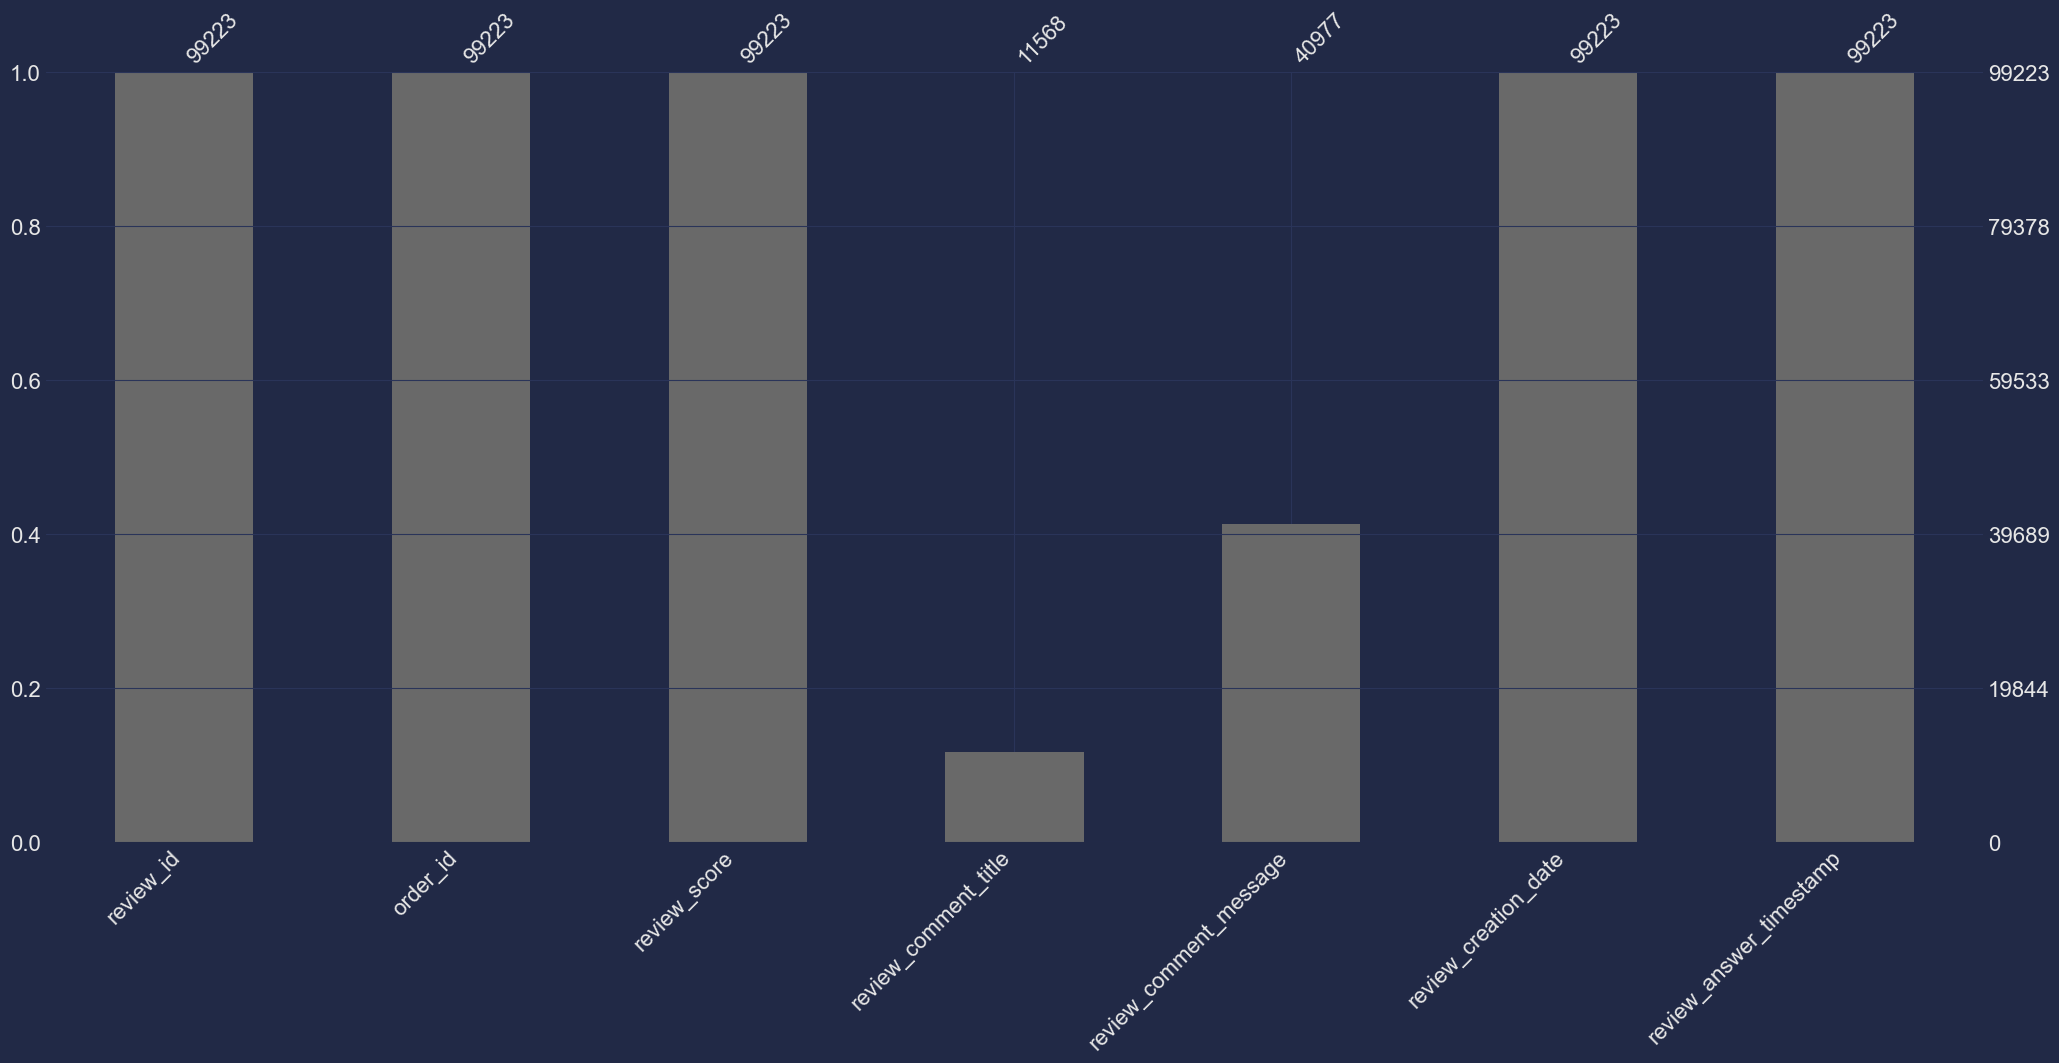

In [191]:
missingno.bar(data_order_reviews)

In [192]:
data_order_reviews.drop(columns=['review_comment_title','review_comment_message'],inplace=True)

### Check nulls

In [193]:
data_order_reviews.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

### Check Duplicated

In [194]:
data_order_reviews.duplicated().sum()

0

### load orders dataset

In [195]:
data_orders = pd.read_csv('Data/olist_orders_dataset.csv')
data_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [196]:
data_orders.order_status.value_counts()

order_status
delivered      96477
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

### Update data types to DateTime

In [197]:
data_orders.order_purchase_timestamp = data_orders.order_purchase_timestamp.astype('datetime64[ns]')
data_orders.order_approved_at = data_orders.order_approved_at.astype('datetime64[ns]')
data_orders.order_delivered_carrier_date = data_orders.order_delivered_carrier_date.astype('datetime64[ns]')
data_orders.order_delivered_customer_date = data_orders.order_delivered_customer_date.astype('datetime64[ns]')
data_orders.order_estimated_delivery_date = data_orders.order_estimated_delivery_date.astype('datetime64[ns]')
data_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99440 entries, 0 to 99439
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99440 non-null  object        
 1   customer_id                    99440 non-null  object        
 2   order_status                   99440 non-null  object        
 3   order_purchase_timestamp       99440 non-null  datetime64[ns]
 4   order_approved_at              99440 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97659 non-null  datetime64[ns]
 6   order_delivered_customer_date  97659 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99440 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


### Check nulls

In [198]:
data_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1781
order_delivered_customer_date    1781
order_estimated_delivery_date       0
dtype: int64

In [199]:
data_orders[data_orders.order_status == 'approved']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
44897,a2e4c44360b4a57bdff22f3a4630c173,8886130db0ea6e9e70ba0b03d7c0d286,approved,2017-02-06 20:18:17,2017-02-06 20:30:19,NaT,NaT,2017-03-01
88457,132f1e724165a07f6362532bfb97486e,b2191912d8ad6eac2e4dc3b6e1459515,approved,2017-04-25 01:25:34,2017-04-30 20:32:41,NaT,NaT,2017-05-22


In [200]:
data_orders[(data_orders.order_status == 'delivered') & (data_orders.isnull().any(axis=1))]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [201]:
data_orders.order_approved_at = data_orders.order_approved_at.fillna(data_orders.order_purchase_timestamp)
data_orders.order_delivered_carrier_date = data_orders.order_delivered_carrier_date.fillna(data_orders.order_delivered_customer_date)
data_orders.order_delivered_customer_date  = data_orders.order_delivered_customer_date.fillna(data_orders.order_delivered_carrier_date)

In [202]:
data_orders.drop(columns=['order_delivered_carrier_date','order_delivered_customer_date'],inplace=True)

In [203]:
data_orders.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_estimated_delivery_date    0
dtype: int64

### load Products dataset

In [204]:
data_products = pd.read_csv('Data/olist_products_dataset.csv')
data_products.head()

,product_id,product_category_name,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Beauty,287,1,225,16,10,14
1,3aa071139cb16b67ca9e5dea641aaa2f,Home,276,1,1000,30,18,20
2,96bd76ec8810374ed1b65e291975717f,Sports,250,1,154,18,9,15
3,cef67bcfe19066a932b7673e239eb23d,Kids,261,1,371,26,4,26
4,9dc1a7de274444849c219cff195d0b71,Home,402,4,625,20,17,13


### Check nulls

In [205]:
data_products.isnull().sum()

product_id                     0
product_category_name         13
product_description_lenght     0
product_photos_qty             0
product_weight_g               0
product_length_cm              0
product_height_cm              0
product_width_cm               0
dtype: int64

In [206]:
data_products.product_category_name = data_products.product_category_name.fillna(data_products.product_category_name.mode()[0])

In [207]:
data_products.isnull().sum()

product_id                    0
product_category_name         0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

### load sellers dataset

In [208]:
data_sellers = pd.read_csv('Data/olist_sellers_dataset.csv')
data_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Check nulls

In [209]:
data_sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

### Update sellers State column

In [210]:
data_sellers.seller_state =data_sellers.seller_state.map(state_map)
data_sellers.seller_state.unique()

array(['São Paulo', 'Rio de Janeiro', 'Pernambuco', 'Paraná', 'Goiás',
       'Santa Catarina', 'Bahia', 'Federal District', 'Rio Grande do Sul',
       'Minas Gerais', 'Rio Grande do Norte', 'Mato Grosso', 'Ceará',
       'Paraíba', 'Acre', 'Espírito Santo', 'Rondônia', 'Piauí',
       'Mato Grosso do Sul', 'Sergipe', 'Maranhão', 'Amazonas', 'Pará'],
      dtype=object)